<p style="align: center;"><img align=center src="https://mailfit.com/wp-content/uploads/2019/11/lego-5.png"  width=900></p>
<h1 style="text-align: center;"><b>«Практика № 5 - Продвинутые инструменты для работы с ненормальным распределением
»</b></h3>


# Вспомним теорию - ЦПТ

<div class="alert alert-info">
    
Пусть есть бесконечная последовательность независимых одинаково распределенных случайных величин с конечным математическим ожиданием и дисперсией. Тогда:

<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS5j9TYiUJzCjPsfT7_zXuWwmA3Fyg8vaf_JA&usqp=CAU'>

# Бустрап

<p style="align: center;">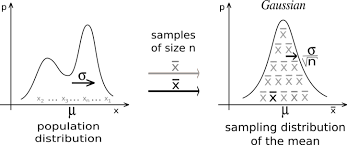</p>


# Покемоны и AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое памяти одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

# Данные A/B тестирования

In [ ]:
import pandas as pd # Для удобной работы с таблицами 
import numpy as np

from scipy import stats # При работе со статистикой

In [ ]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'

data = pd.read_csv(pokemon_path, error_bad_lines=False)  # Откроем датасет
data.head()

# Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается,
# что они имеют одинаковую значимость

In [ ]:
# Сгруппируем информацию по классу
data.groupby('Class 1').mean()

In [ ]:
# Сгруппируем по классам и посчитаем количество в каждом классе, чтоб определеить самые представленные
# data['Class 1'].value_counts()

# Задача - сравнить два класса покемонов

<div class="alert alert-warning">


Датасет полезный, т.к он комбинирует в себе как численные признаки, так и категориальные!
    
На этом датасете можно проверить множество гипотез. Однако, начнем с того, что проверим, есть ли значимое различие в аттаке (Attack) между двумя классами покемонов **Normal** и **Water**
    
</div>

# Посмотрим на распределения в каждой группе

<div class="alert alert-info">
Гистограмма позволяет зрительно оценить распределение данных. Гистограмма дает информацию о разбросе, средних значениях.
Важно иметь нормальное распределение, чтобы в дальнейшем мы могли их анализировать, для других критериев распределение не имеет значения.
</div>

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
column2compare = 'Defense'

v_1 = data.loc[data["Class 1"] == "Water"]
v_2 = data.loc[data["Class 1"] == "Normal"]

bins = 15
plt.figure(figsize=(15, 10))
plt.hist(v_1[column2compare], bins=bins, alpha=0.9, edgecolor="black", label="Water")
plt.hist(v_2[column2compare], bins=bins, alpha=0.7, label="Normal")
plt.legend(loc="upper right")
plt.show()

<div class="alert alert-info">

Видим, что отличий заметить не удается! Более того, распределение не совсем нормальное

In [ ]:
# тест Шапиро!

statistic, p_value = stats.shapiro(data["Attack"])

print("Статистики=%.3f, p=%.3f" % (statistic, p_value))

alpha = 0.05
if p_value > alpha:  # Интерпретируем
    # H_0 = Распределение нормальное
    print("Нормальное распределение (не отвергаем H0)")
else:
    print("Не нормальное распределения (отвергаем H0)")

In [ ]:
import seaborn as sns


def show_boxplt(data):
    df = data  # .loc[data['Attack'] < 170].copy(); #  Можно удилить выбросы при желении

    return sns.catplot(
        x="Class 1",
        y="Attack",
        hue="Legendary",  # col = 'Legendary',
        data=df,
        kind="box",
        height=8,
        aspect=1.5,
    )


show_boxplt(data)

# А что скажут критерии?

In [ ]:
t_value, p_value = stats.ttest_ind(v_1["Attack"], v_2["Attack"])

alpha = 0.05
if p_value > alpha:  # Интерпретируем
    print("Одинаковые распределения (не отвергаем H0)")
else:
    print("Разные распределения (отвергаем H0)")

In [ ]:
t_value, p_value = stats.mannwhitneyu(v_1["Attack"], v_2["Attack"])

alpha = 0.05
if p_value > alpha:  # Интерпретируем
    print("Одинаковые распределения (не отвергаем H0)")
else:
    print("Разные распределения (отвергаем H0)")

<div class="alert alert-warning">

Хм, пока не получилось, но мы не будем утчаиваться!!!

In [ ]:
#Как получить нормальное распределение в данных? Можно взять логарифм. Но тоже выйдет не очень хорошо в этом случае.
# plt.hist(np.log(v_30['sum_gamerounds']+0.001), bins=15, alpha=1, edgecolor='black', label='gate 30', density=True);
# plt.hist(np.log(v_40['sum_gamerounds']+0.001), bins=15, alpha=1, edgecolor='black', label='gate 40', density=True);

# Будстреп или ЦПТ в деле !!!!

Если вдруг оказалось сложно, то вот еще один способ визуализации различий - будстреп

In [ ]:
from tqdm import tqdm # для визуализации работы цикла


plt.figure(figsize=(15, 10))

boot_1d = [] # Создаем список получаемых будстапированных значений средних в каждого классе
for i in tqdm(range(1000)):
    boot_mean = (
        data.sample(frac=1, replace=True).groupby("Class 1")["Attack"].mean()
    )  # retention_1
    boot_1d.append(boot_mean)

# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)

# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind="density", figsize=(15, 5));

In [ ]:
# Распределения похожи на нормальные. Классы  между собой отличаются

In [ ]:
# Для интересующих нас классов Water

boot_1d[["Normal", "Water"]].plot(kind="density", figsize=(15, 5))

<div class="alert alert-success">
    
Отлично. Мы заметили различия невооруженным глазом!
    
Такой способ увеливает чувствительно критериев в разы. Проверим это!
    
Теперь критерий Стьюдента тоже справиться с этой задачей

In [ ]:
t_value, p_value = stats.ttest_ind(boot_1d["Normal"], boot_1d["Water"])

alpha = 0.05
if p_value > alpha:  # Интерпретируем
    print("Одинаковые распределения (не отвергаем H0)")
else:
    print("Разные распределения (отвергаем H0)")

# Больше данных или для чего нужен бакетинг

In [ ]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/big_dataset_pokemons.csv'

big_data = pd.read_csv(pokemon_path, error_bad_lines=False, index_col=0)  # Откроем датасет
print(big_data.shape)
big_data.head()

# Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается,
# что они имеют одинаковую значимость

In [ ]:
sns.displot(big_data, x='Attack', hue = 'Class 1', alpha=0.5, height = 6, aspect=2.5); 

In [ ]:
# Проверим распределение с помощью теста Шапиро!

statistic, p_value = stats.shapiro(big_data["Attack"])
print("Статистики=%.3f, p=%.3f" % (statistic, p_value))

if p_value > 0.05:  # Интерпретируем
    # H_0 = Распределение нормальное
    print("Нормальное распределение (не отвергаем H0)")
else:
    print("Не нормальное распределения (отвергаем H0)")

# Бакетинг VS Будстрап на большем датасете

In [ ]:
plt.figure(figsize=(15, 10))

boot_1d = [] # Создаем список получаемых будстапированных значений средних в каждого классе
for i in tqdm(range(1000)):
    boot_mean = (
        big_data.sample(frac=1, replace=True).groupby("Class 1")["Attack"].mean()
    )  # retention_1
    boot_1d.append(boot_mean)

# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)

# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind="density", figsize=(15, 5));

In [ ]:
# Проверим с помощью теста Шапиро!

statistic, p_value = stats.shapiro(boot_1d["Normal"])
print("Статистики=%.3f, p=%.3f" % (statistic, p_value))

if p_value > 0.05:  # Интерпретируем
    # H_0 = Распределение нормальное
    print("Нормальное распределение (не отвергаем H0)")
else:
    print("Не нормальное распределения (отвергаем H0)")

<div class="alert alert-success">

Отлично, теперь различить классы стало проще.

<div class="alert alert-warning">

Обратим внимание, что считается ощутимо дольше! А если мы будем считать не среднее, а любую другую метрику, то время может еще сильнее увеличиться. А чем нам ответит бакетинг?

<img src='https://habrastorage.org/r/w1560/webt/cd/1h/x-/cd1hx-k8rgilkmwxafotz3-tgok.png'>


In [ ]:
n_bucket = len(big_data) // 200  # Берем бакеты по 250 покемонов
big_data['bucket'] = np.random.randint(1, n_bucket+1, len(big_data)) 

In [ ]:
# Считаем среднее внутри каждого бакета
data_grouped= big_data.groupby(['bucket'], as_index=False).agg(mean_Attack=('Attack', 'mean'))
sns.displot(data_grouped, x='mean_Attack', alpha=0.5, height = 6, aspect=1.7, bins=30); 

<div class="alert alert-success">

Моментально отработало!!

In [ ]:
# тест Шапиро!

statistic, p_value = stats.shapiro(data_grouped["mean_Attack"])
print("Статистики=%.3f, p=%.3f" % (statistic, p_value))

if p_value > 0.05:  # Интерпретируем
    # H_0 = Распределение нормальное
    print("Нормальное распределение (не отвергаем H0)")
else:
    print("Не нормальное распределения (отвергаем H0)")

# Выводы

* Будстрап и бакетинг позволяют привести распределение к нормально
* Бакетинг больше подходит для крупных датасетов